# Breast Histopathology Image Classification Study

In [13]:
!pip install tensorflow


  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=cd36fc97887b76e28bd435cd2fdb34591967f14b8b22b2701fb1c55fe7131a0d
  Stored in directory: c:\users\l\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=827da761773104e037502abd20ccde61fbf66ea04a64d3780f69dcefd0dfa049
  Stored in directory: c:\users\l\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


Life Cycle 1: Understand the problem.

The idea behind this project was to train a model,we want to show that machine learning can be used to identify cancerous tumors from benign tumors and show its predictive effectiveness. In order to model this with our data, we will be using supervised learning with a classification algorithm that maps the input to either M (malignant) or B (benign). The classifiers used for our model at are logistic regression, CNN and Forrest Tree. 

We have labeled each step in our approach and have tried to go into details about what exactly is hapening, the results that we got and their meaning as well as why we took the approach that we did.


## 1. Load in Datasets

Life cycle 2: Collect the data
We used kaggle.com to download the dataset called "Breast Histopathology Images" (https://www.kaggle.com/adacslicml/breast-histopathology-images)
which contains a set of 'testing' and 'training' data as well as an extra 'valid' set. To access and manipulate this data through the notebook we used several libraries, which include numpy for manipulation,
matplotlib to create graphs, glob to find file paths matching or using patterns,and tensorflow for training the model.

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import glob as glob
import os
import tensorflow as tf

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

### Load in Training Set

Life Cycle 3: Prepare Data

In this section we loaded the names of all files in our training set from the Cancer and NoCancer folders into the varibales labeled `train_cancer` and `train_nocancer` using glob. We then added the images to `X_train` and the labels containing a 0 or 1 to `y_train`. Furthermore, we resized our imgages and added them to an array that will be remain untouch,so that it can later be referenced and used as a sort of control group to test for misclassifications. 


In [2]:
# add both cancer and non cancer imgs to X_train
train_cancer = glob.glob('../input/breast-histopathology-images/BreastCancer/train/1_Cancer/*.png')[:2000]
train_nocancer = glob.glob('../input/breast-histopathology-images/BreastCancer/train/0_NoCancer/*.png')[:2000]

In [3]:
m = len(train_cancer)  
height = 150
width = 150

X_train_orig = []
X_train = np.zeros((2*m, height * width * 3))
count = 0


for name in train_cancer:
    im = Image.open(name)
    X_train_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_train[count] = im_array
    count += 1
    
for name in train_nocancer:
    im = Image.open(name)
    X_train_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_train[count] = im_array
    count += 1

In [4]:
#add labels to y_train
cancer_labels = [1 for i in range(m)]
noncancer_labels = [0 for i in range(m)]

y_train = np.array(cancer_labels + noncancer_labels)

### Load in Test Set

For the Testing set we followed an identical approach, where we loaded the names of all of our files from a separate 'test' folder bearing the same names 'Cancer' and 'NoCancer'. We created two arrays,`X_test` and `y_test`, the labels containing a 0 or 1 will be stored in `y_test`. We resized our images, added them to the array `X_test`, and maintained an original copy or set of the images stored in the array `X_test_orig`. This last array remains untouched and is to be used to identify misclassifications later on. 

In [5]:
# add both cancer and non cancer imgs to X_test
test_cancer = glob.glob('../input/breast-histopathology-images/BreastCancer/test/0_NoCancer/*.png')[:2000]
test_nocancer = glob.glob('../input/breast-histopathology-images/BreastCancer/test/1_Cancer/*.png')[:2000]

In [6]:
X_test_orig = []
X_test = np.zeros((2*m, height * width * 3))
count = 0

for name in test_cancer:
    im = Image.open(name)
    X_test_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_test[count] = im_array
    count += 1
    
for name in test_nocancer:
    im = Image.open(name)
    X_test_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_test[count] = im_array
    count += 1

In [7]:
#add labels to Y_test
cancer_labels = [1 for i in range(m)]
noncancer_labels = [0 for i in range(m)]

y_test = np.array(cancer_labels + noncancer_labels)

### Load Validation Set

For the Validation set we followed similar steps as in the blocks prior, loading the names of all of our files from a separate 'valid' folder bearing the same names 'Cancer' and 'NoCancer'. We created the array `test_images`, containing a 0 or 1 to be stored in `test_labels`. 

The validation set works in conjuction with the training set to fine tune the parameters. Similar to the quizzes or mini exams that a student might take throughout the semester to asses how well they are learning, understanding and applying the material. consequently this also polishes and fine tunes their knowledge on a subject (ideally). The test set allows us to evaluate the model after all of the training have taken place, similar to a final exam. It helps us accurately meassure the performance of the model and how it generalizes patterns to the new data.

In [8]:
# add both cancer and non cancer imgs to test_images
valid_cancer = glob.glob('../input/breast-histopathology-images/BreastCancer/valid/0_NoCancer/*.png')[:1000]
valid_nocancer = glob.glob('../input/breast-histopathology-images/BreastCancer/valid/1_Cancer/*.png')[:1000]

In [9]:
test_images = []

for name in valid_cancer:
    im = Image.open(name)
    test_images.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    test_images[count] = im_array
    count += 1
    
for name in valid_nocancer:
    im = Image.open(name)
    test_images.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    test_images[count] = im_array
    count += 1

In [10]:
#add labels to Test_labels
valid_cancerlabels = [1 for i in range(m)]
valid_nocancerlabels = [0 for i in range(m)]

test_labels = np.array(valid_cancerlabels + valid_nocancerlabels)

test_labels = np.asarray(test_labels)

# 2. Random Forest Classifier

Life Cycle 4: Train Model
    
In this section we used a series of training model Random Forest Classifier, Logistic Regression, and Keras CNN Model.

The Random Forest Classifier (out of the many one) is useful for tasks that involved regression and classification. It works by iterating through a dataset and with each iteration it split/groups similar data points together in what is called a decision tree. This process is repeated to eventually build the namesake forrest. Each algorithm/tree comes up with a set of criteria to group or identify the data it encounters. After the forrest is built, the different approaches taken by each of the trees are combined and used to generate more accurate and stable decisions. 

Logistic Regression is a useful model for classification problems where a binary, either or answer is expected. It works by using statistics to predict the probability of an outcome based on the variable interactions. This parallels with our problem statement because we would like to classify malignant vs beningn tumors from a given dataset. 

Finally we have the Keras Convolutional Neural Network. Keras is a deep learning library that we used to build a CNN. This model is useful for classifying images that are not fixed, meaning that the the subject being identified can appear in any position in the image. 



## Train the Model

We started this session by importing the random forest classifier algorithm and making a referenceable object. We passed the training set as argument
and ______.

We test the accuracy rate of our training model for which we get 100%, this implies that we probably have an overfitting problem with our model. 

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_train_pred =  rf.predict(X_train)

### Training Accuracy

In [14]:
np.mean(y_train == y_train_pred)

1.0

## Test the Model

In [15]:
y_test_pred = rf.predict(X_test)

### Testing Accuracy

In [16]:
np.mean(y_test_pred == y_test)

0.3565

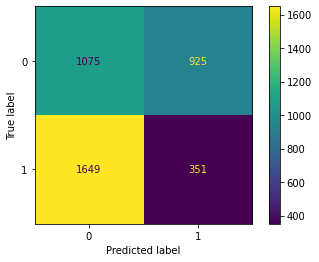

In [17]:
plot_confusion_matrix(rf, X_test, y_test, values_format = 'd')

# Conclusion

For the Random Forrest Classifier we had an overfitting problem with our model since it adapted incredibly well to our training data but could not generalize that knowledge when used against the testing set. This is indicated by the training accuracy we recieved of a 100%, this result tells us right away tell us that we have a problem. This could be because we do not have enough data or need to decrease the complexity of our model. This was confirmed when ran the testing model and got a 35.65%, which is a terribly underwhelming performance. If we focus on our confusion matrix, a graph that describes the outcome/peformance of our classification model. 

The graph is divided into four sections. Starting with our upper right corner, the results here represent a true positive. The upper left hand provides a false positive meaning that the model misclassified something as a positive result when  in fact it was negative. The bottom left shows the opposite of this phenomenom, a false negative, which misindentified a positive result as negative. Finally, the bottom right is a true negative. In the final performance evaluation, out of a pool of 4,000 our model accurately diagnosed 1075 of those cases. For 1649 of those unfortunate souls, they could have gotten chemo and lived but our model told them that they were fine and dandy when in reality their cells had mutated into termites. Conversely for 925 we diagnosed them with cancer and made them undergo chemo and sell all of their belongings for a disease thye did not have. Finally, 351 is the number of people that the model accurately predicted as healthy human beings.

# 3. Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

## Train the Model

In [5]:
lr = LogisticRegression(max_iter = 10000)

In [6]:
lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [7]:
y_train_pred =  lr.predict(X_train)

NameError: name 'X_train' is not defined

### Training Accuracy

In [8]:
np.mean(y_train == y_train_pred)

NameError: name 'y_train' is not defined

## Test the Model

In [9]:
plot_confusion_matrix(lr, X_test, y_test, values_format = 'd')

NameError: name 'X_test' is not defined

In [10]:
y_pred = lr.predict(X_test)

NameError: name 'X_test' is not defined

### Testing Accuracy

In [11]:
np.mean(y_pred == y_test)

NameError: name 'y_pred' is not defined

In [12]:
plot_confusion_matrix(rf, X_test, y_test, values_format = 'd')

NameError: name 'rf' is not defined

## Conclusion

The Logistic Regression is the most common approach in the preeliminary phase of cancer diagnosis since it excels in binary decisions like classifications problems. For this classifier we imported the logistic regression out library and created a referenceable object that would allow us to use and manipulate the model. We passed in the training data prepared at the beginning.To test the peformance of the knowledge acquire in training we similarly loaded the testing data and asked it to create another confusion matrix plot for visualization. 

This model took several hours to run locally since we lacked the computing power  of our ___, and the for the training section we obtained an accuracy rate of ___. This suggest ____.



# 4. Keras NN Model

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Train the Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(150, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(300, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(300, (3, 3), activation='relu'))


### Training Accuracy


In [ ]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

## Test the Model


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10))


### Testing Accuracy

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_orig, y_train, epochs=10, 
                    validation_data=(test_images, test_labels))


## Conclusion

-- why is this a good classifer for us


# "The reality is not ideal." ~ Dr. Ding


We ended up changing our dataset a numerous amount of times, each for different reasons, but when we finally thought we had found one, we had to change it again because it was part of a competition and did not allow for collaboration on the platform we were using. We had great difficulty loading the data with the second to last dataset for some reason, and it was substantial enough that we the amount of resources crashed the notebook. We lacked the cpu power to run the dataset and it was taking a long time to get anywhere even with the cpu running at full capacity. Even with our current dataset,  the linear regression took hours to run.